# Batch Lamda1050 jump correction script

### Author: Vinicio Soto, CICIMA
### This script works with raw Lambdas1050's ASC files in batch. It corrects Lambdas1050's detector jump between 857 nm and 858 nm 

### Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

### Instructions:

Write your archive folder's path in file_folder_data_path 

In [2]:
#Lists all archives in folder
file_folder_data_path = r"C:\Users\EstebanSoto\Downloads\VINICIO\VINICIO\2023-03-CICIMAUCR-2-REFLECTANCE"
file_list = os.listdir(file_folder_data_path)

#file extension
file_extension = ".ASC"

# filters a list of strings to create a new list containing only the elements that end with ".ASC"

def filter_substring_elements(path_strings, substring):
    filtered_paths = [path for path in path_strings if substring in path]
    return filtered_paths

# Filtering elements ending with ".ASC"
filtered_list = filter_substring_elements(file_list, file_extension)

# Displaying the filtered list
print(filtered_list)


['CICIMAUCR0001-1.Sample.ASC', 'CICIMAUCR0001-2.Sample.ASC', 'CICIMAUCR0001-3.Sample.ASC', 'CICIMAUCR0006-1.Sample.ASC', 'CICIMAUCR0006-2.Sample.ASC', 'CICIMAUCR0006-3.Sample.ASC', 'CICIMAUCR0008-1.Sample.ASC', 'CICIMAUCR0008-2.Sample.ASC', 'CICIMAUCR0008-3.Sample.ASC', 'CICIMAUCR0009-1 fail.Sample.ASC', 'CICIMAUCR0009-2.Sample.ASC', 'CICIMAUCR0009-3.Sample.ASC', 'CICIMAUCR0012-1.Sample.ASC', 'CICIMAUCR0012-2.Sample.ASC', 'CICIMAUCR0012-3.Sample.ASC', 'CICIMAUCR0013-1.Sample.ASC', 'CICIMAUCR0013-2.Sample.ASC', 'CICIMAUCR0013-3.Sample.ASC', 'CICIMAUCR0014-1.Sample.ASC', 'CICIMAUCR0014-1fail.Sample.ASC', 'CICIMAUCR0014-2.Sample.ASC', 'CICIMAUCR0014-3.Sample.ASC', 'CICIMAUCR0015-1.Sample.ASC', 'CICIMAUCR0015-2.Sample.ASC', 'CICIMAUCR0015-3.Sample.ASC', 'CICIMAUCR0018-1.Sample.ASC', 'CICIMAUCR0018-2.Sample.ASC', 'CICIMAUCR0018-3.Sample.ASC', 'CICIMAUCR0019-1.Sample.ASC', 'CICIMAUCR0019-2.Sample.ASC', 'CICIMAUCR0019-3.Sample.ASC', 'CICIMAUCR0020-1.Sample.ASC', 'CICIMAUCR0020-2.Sample.ASC', 

### Functions

In [3]:
def get_metadata_and_dataframe(file_location):
    """This function reads L1050 .ASC files directly and returns a dictionary with metadata and the dataframe with the measurements"""
    import os
    import pandas as pd
    import re

    def get_sample_code_from_filename(row_str, file_location):
        #print("string")
        #print(file_location)
        filename = os.path.basename(file_location)
        re1 = r"([a-zA-Z\d]+)(?:-\d)*(?:.Sample)*.(?:txt)*(?:ASC)*"
        #Names are in the form CODE-MEASUREMENTNUMBER.TXT
        p = re.compile(re1)
        m = p.match(filename)
        # print(f"match filename: {m}")
        if m:
            # print(f"group 1: {m.group(1)}")
            return(m.group(1))
        return get_sample_code(file_str)

    def get_sample_code(row_str):
        #Tries to get the sample code from the file, if it does not match
        #it tries to get it from the filename.
        # print("string")
        # print(row_str)
        re1 = r"([a-zA-Z\d]+)(?:-\d)*(?:.Sample)*.(?:txt)*(?:ASC)*"
        #Names are in the form CODE-MEASUREMENTNUMBER.TXT
        p = re.compile(re1)
        m = p.match(row_str)
        # print(f"match: {m}")
        if m:
            return(m.group(1))
        else:
            ""

    def responses(str):
        re1 = "\d+/(\d+,\d+) \d+,\d+/(\d+,\d+)"
        p = re.compile(re1)
        m= p.match(str)
        if m:
            return m.group(1),m.group(2)
        else:
            return "",""
    def attenuator_settings(str):
        re1 = "S:(\d+,\d+) R:(\d+,\d+)"
        p = re.compile(re1)
        m= p.match(str)
        if m:
            return m.group(1),m.group(2)
        else:
            return "",""
    def slit_pmt_aperture(str):
        re1 = "\d+/servo \d+,\d+/(\d+,\d+)"
        p = re.compile(re1)
        m= p.match(str)
        if m:
            return m.group(1)
        else:
            return ""
    #Initializa metadata dict
    metadata = {}

    #Read header
    lines = []
    with open(file_location, encoding= "latin1") as myfile:
        lines = myfile.readlines()[0:90]
    metadata["header"] = "".join(lines)


    #read_metadata
    f = open(file_location, encoding= "latin1")

    df = pd.DataFrame()
    with f as data_file:
        for index, row in enumerate(data_file): #0-89

            row_str = row.strip()
            if index +1 == 3: #Filename and extension
                metadata["filename"]= row_str
                metadata["code"] = get_sample_code_from_filename(row_str, file_location)
            if index + 1 == 4: #date DD/MM/YYYY
                metadata["date"]= row_str
            if index + 1 == 5:#Time HH:MM:SS.SS
                metadata["time"]= row_str
            if index + 1 == 8:#user
                metadata["user"]= row_str
            if index + 1 == 9:#description
                metadata["description"]= row_str
            if index + 1 == 10:#minimum wavelength
                metadata["minimum_wavelength"]= row_str
            if index + 1 == 12:#equipment name
                metadata["equipment"]= row_str
            if index + 1 == 13:#equipment series
                metadata["series"]= row_str
            if index + 1 == 14:#data visualizer version, equipment version, date and time
                metadata["software"]= row_str
            if index + 1 == 21:#Operating mode
                metadata["operating_mode"]= row_str
            if index + 1 == 22: #Number of cycles
                metadata["cycles"]= row_str
            if index + 1 == 32: #range/servo
                metadata["slit_pmt"]= slit_pmt_aperture(row_str)
            if index + 1 == 33:
                metadata["response_ingaas"], metadata["response_pmt"]= responses(row_str)
            if index + 1 == 35: #pmt gain, if 0 is automatic
                metadata["pmt_gain"]= row_str
            if index + 1 == 36: #InGaAs detector gain
                metadata["ingaas_gain"]= row_str
            if index + 1 == 42:#monochromator wavelength nm
                metadata["monochromator_change"]= row_str
            if index + 1 == 43:#lamp change wavelength
                metadata["lamp_change"]= row_str
            if index + 1 == 44:#pmt wavelength
                metadata["pmt_change"]= row_str
            if index + 1 == 45:#beam selector
                metadata["beam_selector"]= row_str
            if index + 1 == 46:
                metadata["cbm"]= row_str
            if index + 1 == 47: #cbd status, on/off
                metadata["cbd_status"]= row_str
            if index + 1 == 48: #attenuator percentage
                metadata["attenuator_sample"], metadata["attenuator_reference"]= attenuator_settings(row_str)
            if index + 1 == 49:
                metadata["polarizer"]= row_str
            if index + 1 == 80:
                metadata["units"]= row_str
            if index + 1 == 81:
                metadata["measuring_mode"]= row_str
            if index + 1 == 84:
                metadata["maximum_wavelength"]= row_str
            if index + 1 == 85:
                metadata["step"]= row_str
            if index + 1 == 86:
                metadata["number_of_datapoints"]= row_str
            if index + 1 == 88:
                metadata["maximum_measurement"]= row_str
            if index + 1 == 89:
                metadata["minimum_measurement"]= row_str
            if index +1 == 90:
                break
        df = pd.read_csv(f, sep="\t", decimal =",", names=["wavelength", metadata["measuring_mode"]]).dropna()
        df["wavelength"],df[metadata["measuring_mode"]] = df["wavelength"].astype(float), df[metadata["measuring_mode"]].astype(float)
        df = df[df["wavelength"]<2000]
        return metadata, df

### Correction process function

In [6]:
def jump_correction(file_folder_data_path, filename, metadata):
    #measuring_mode
    measuring_mode = metadata["measuring_mode"]
    
    #constants
    markersize = 1 #Marker size for plots

    # read text file into pandas DataFrame 
    full_path= file_folder_data_path + "\\" + filename
    
    #Read header
    lines = []
    with open(full_path) as myfile:
        lines = myfile.readlines()[0:90] 
    header = "".join(lines)

    #read body
    f = open(full_path)
    df = pd.read_csv(f, sep="\t", decimal = ",", skiprows=90,  
                     names=["wavelength", measuring_mode])
    
    #convert columns to float
    df['wavelength'] = df['wavelength'].astype(float)
    df[measuring_mode] = df[measuring_mode].astype(float)
    

    #This code finds the rows before and after the detector change
    #freq1 is the frequency before the change and freq2 is the frequency after the change
    wavelenght1 = 857.000000 #857
    wavelenght2 = 858.000000 #858
    
    #print("Loc")
    row1 = df.loc[ df['wavelength'] == wavelenght1]
    row2 = df.loc[ df['wavelength'] == wavelenght2]
    row22 = df.loc[ df['wavelength'] == wavelenght2 +1]
    row23 = df.loc[ df['wavelength'] == wavelenght2+2]
    row24 = df.loc[ df['wavelength'] == wavelenght2+3]
    row25 = df.loc[ df['wavelength'] == wavelenght2+4]
    
    #This code finds the values corresponding to those frequencies and creates a correction factor
    
    try:
        data1 = row1.iat[0,1]
        data2 = row2.iat[0,1]
        data22 = row22.iat[0,1]
        data23 = row23.iat[0,1]
        data24 = row23.iat[0,1]
        data25 = row23.iat[0,1]
    
        data2_avg = (data2 + data22+data23+data24+data25)/5
    
        correction_factor= data2_avg/data1
    
        #Multiply all frequencies equal or greater than freq2 by correction_factor
        df2 = df
        df2.loc[df2["wavelength"] <= wavelenght2 -1, [measuring_mode]] *= correction_factor

        #SAVE FILES
        #convert dataframe to numpy
        my_numpy_df_data = df2.to_numpy()
        
        #Create new folder
        corrected_path = file_folder_data_path + "\\jump_corrected_files\\"
        if not os.path.exists(corrected_path):
            os.mkdir(corrected_path)
            
        #saves file, removes .ASC and removes .SAMPLE
        unnecessary_text = [".Sample", ".Cycle1"]
        temp_text = filename.replace('.ASC', ''+'.txt')
        for text in unnecessary_text:
            print(temp_text)
            temp_text = temp_text.replace(text, "")
        
        new_archive_name = corrected_path + temp_text
        
        with open(new_archive_name, 'wb') as f:
            np.savetxt(new_archive_name, my_numpy_df_data,fmt = "%.6f", delimiter="\t", header=header, comments='', )
        with open(new_archive_name, "r") as f:
            data = f.read()
        with open(new_archive_name, "w") as f:
            f.write(data.replace("#DATA\n","#DATA"))
        return df2
    except Exception as e:
        
        print(e)
        return pd.DataFrame([])
    return pd.DataFrame([])
    

### Logic

CICIMAUCR0001-1.Sample.txt
CICIMAUCR0001-1.txt


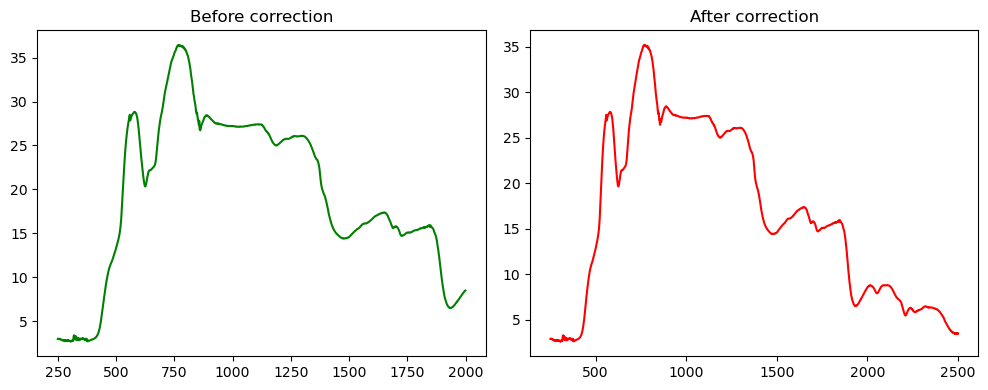

CICIMAUCR0001-2.Sample.txt
CICIMAUCR0001-2.txt


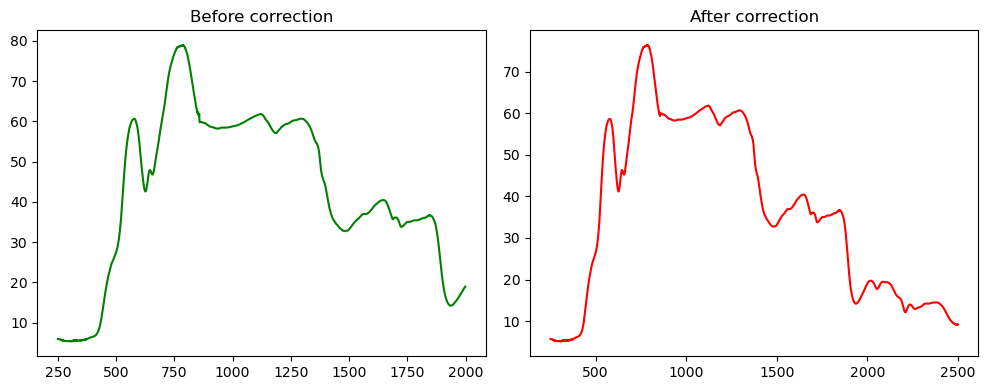

CICIMAUCR0001-3.Sample.txt
CICIMAUCR0001-3.txt


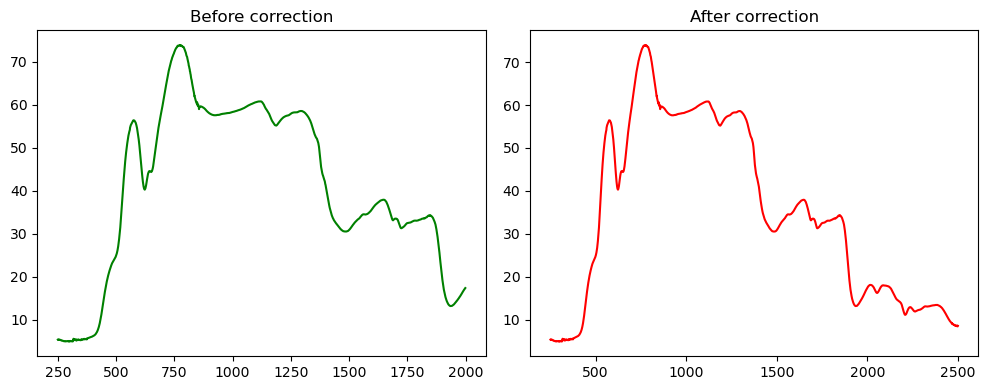

CICIMAUCR0006-1.Sample.txt
CICIMAUCR0006-1.txt


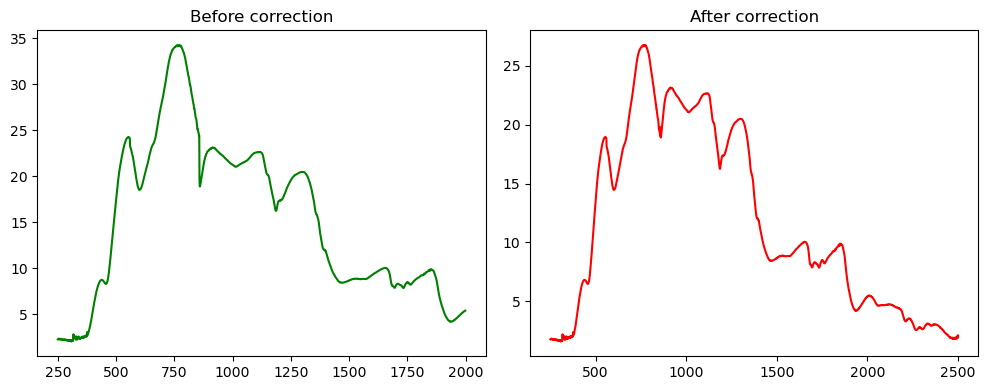

CICIMAUCR0006-2.Sample.txt
CICIMAUCR0006-2.txt


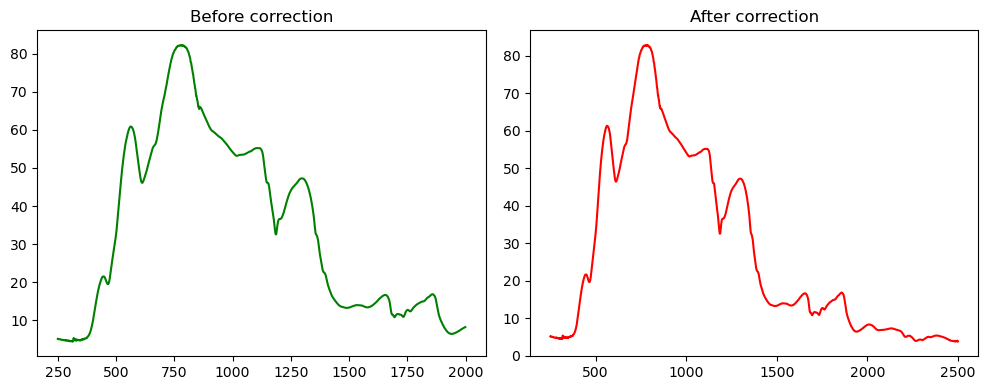

CICIMAUCR0006-3.Sample.txt
CICIMAUCR0006-3.txt


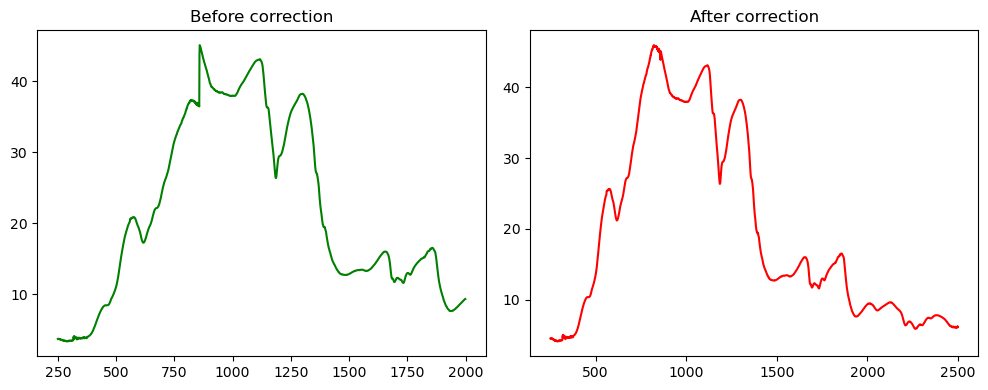

CICIMAUCR0008-1.Sample.txt
CICIMAUCR0008-1.txt


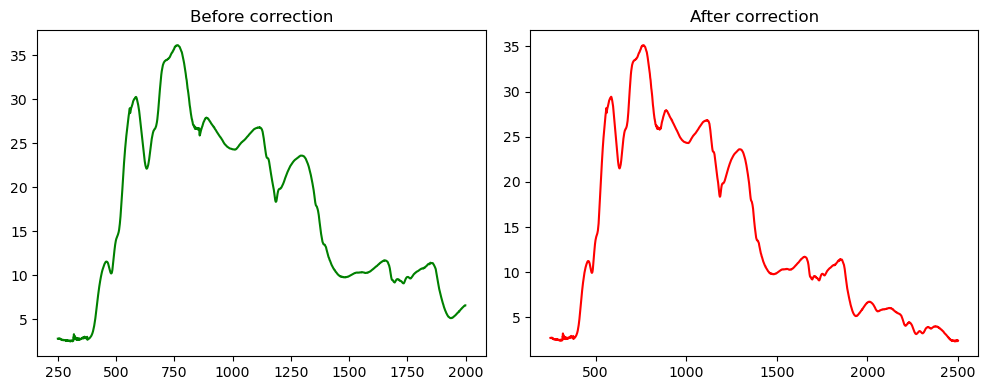

CICIMAUCR0008-2.Sample.txt
CICIMAUCR0008-2.txt


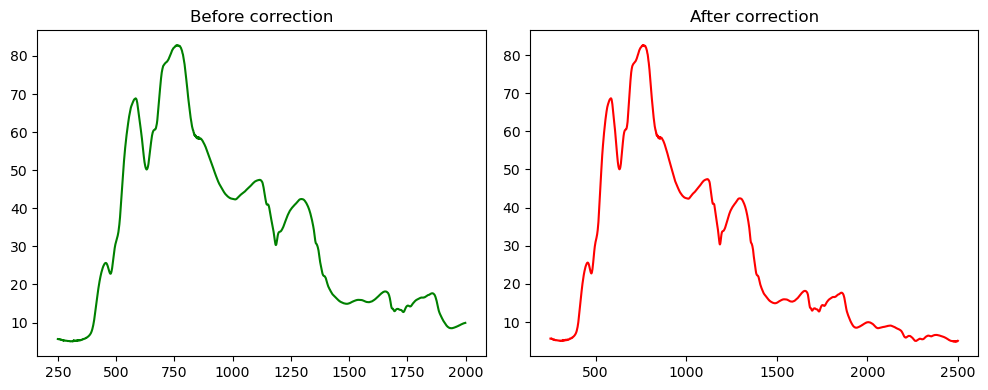

CICIMAUCR0008-3.Sample.txt
CICIMAUCR0008-3.txt


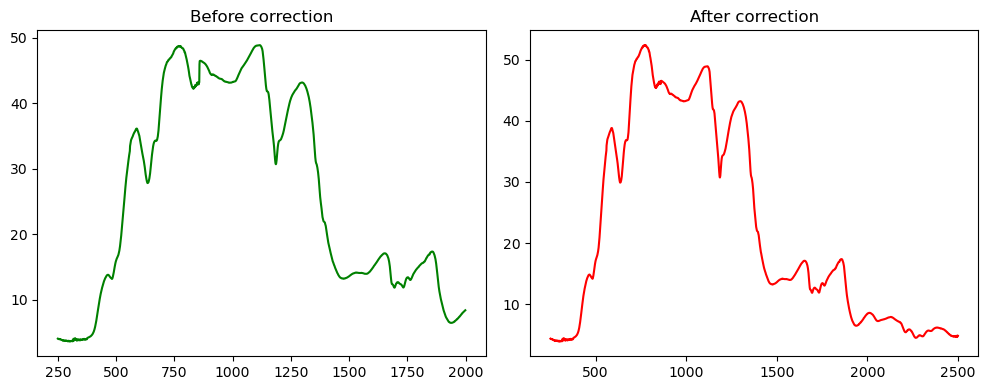

CICIMAUCR0009-1 fail.Sample.txt
CICIMAUCR0009-1 fail.txt


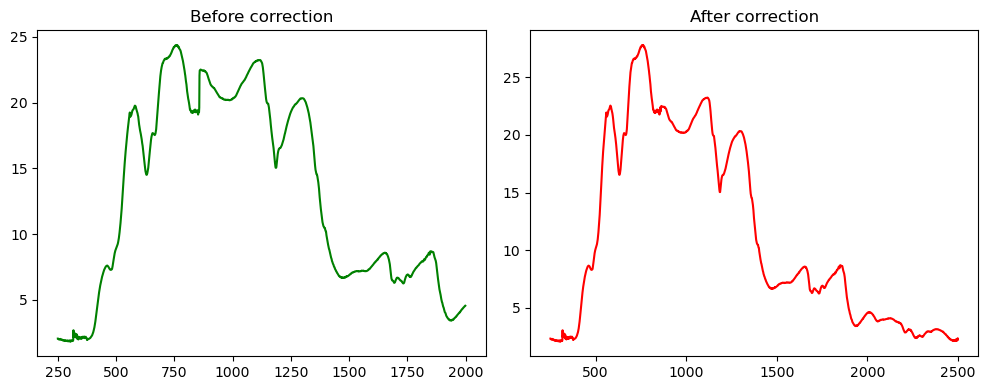

CICIMAUCR0009-2.Sample.txt
CICIMAUCR0009-2.txt


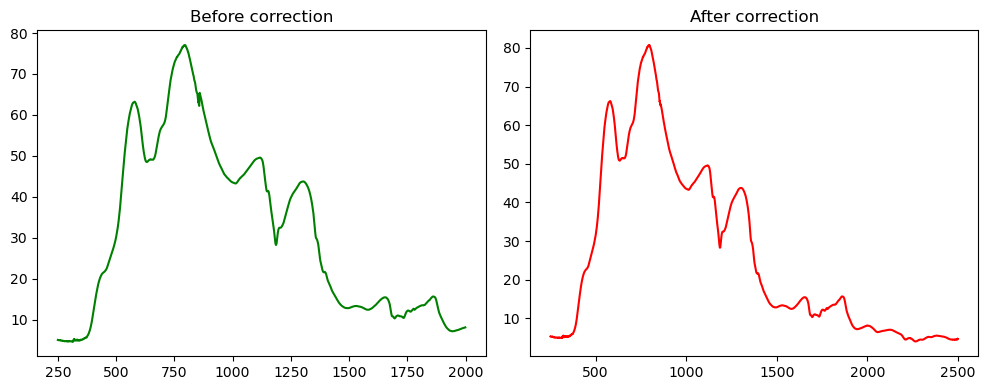

CICIMAUCR0009-3.Sample.txt
CICIMAUCR0009-3.txt


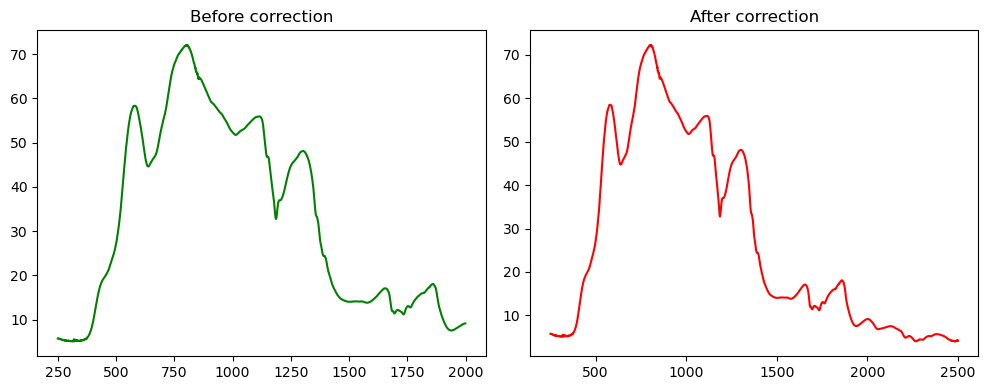

CICIMAUCR0012-1.Sample.txt
CICIMAUCR0012-1.txt


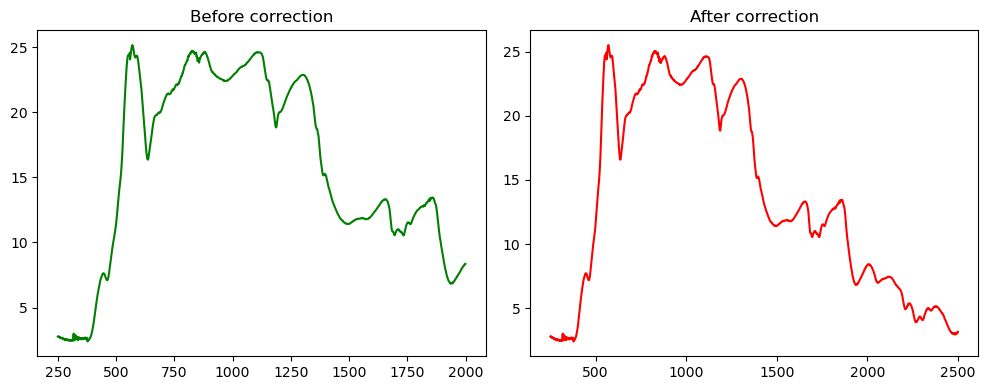

CICIMAUCR0012-2.Sample.txt
CICIMAUCR0012-2.txt


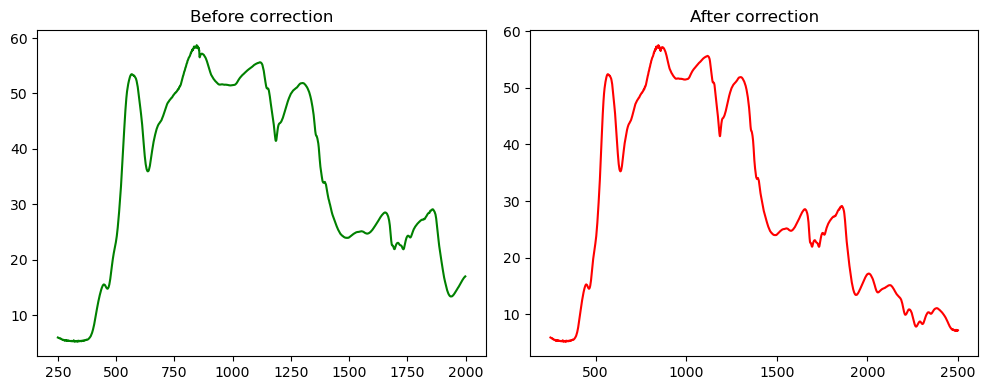

CICIMAUCR0012-3.Sample.txt
CICIMAUCR0012-3.txt


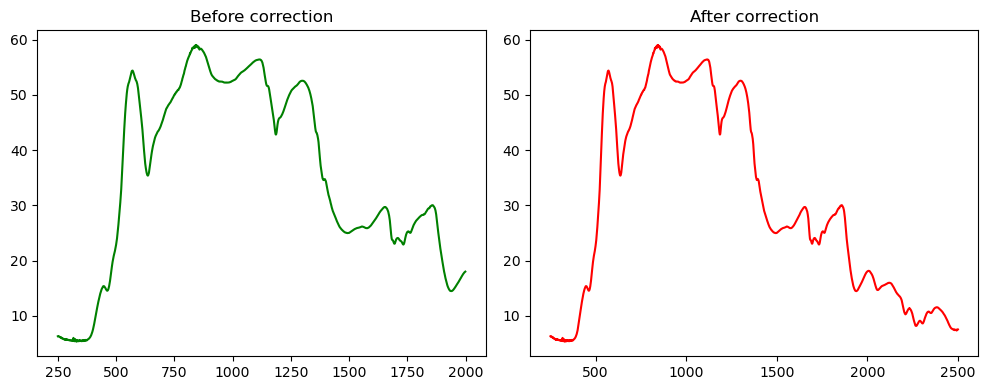

CICIMAUCR0013-1.Sample.txt
CICIMAUCR0013-1.txt


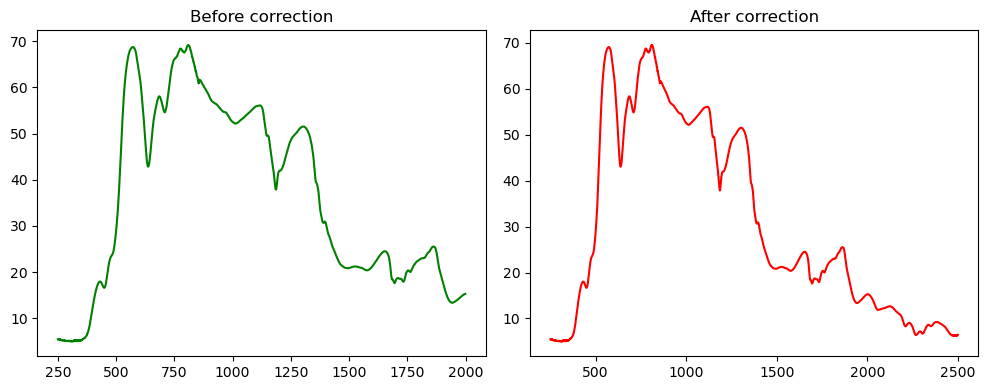

CICIMAUCR0013-2.Sample.txt
CICIMAUCR0013-2.txt


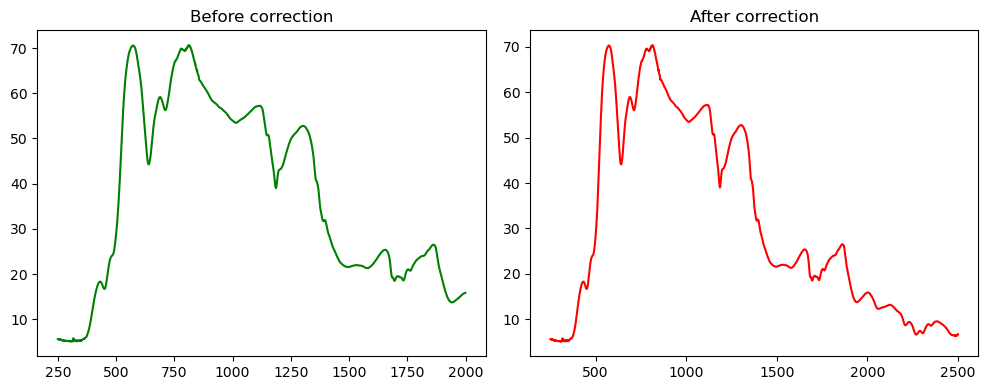

CICIMAUCR0013-3.Sample.txt
CICIMAUCR0013-3.txt


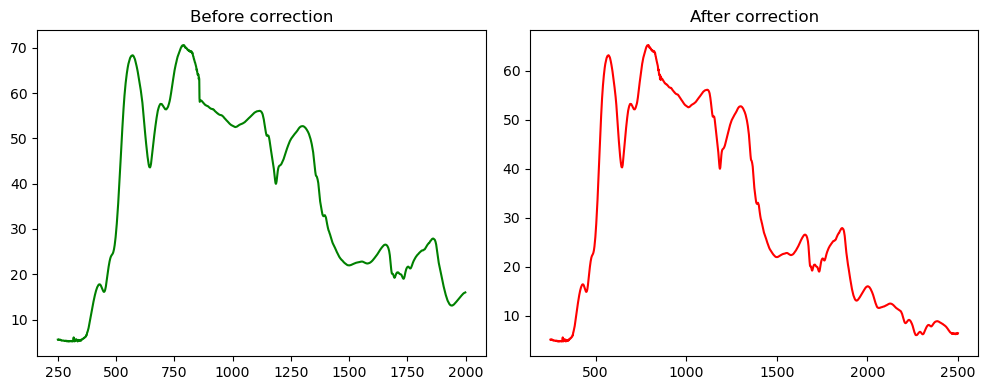

CICIMAUCR0014-1.Sample.txt
CICIMAUCR0014-1.txt


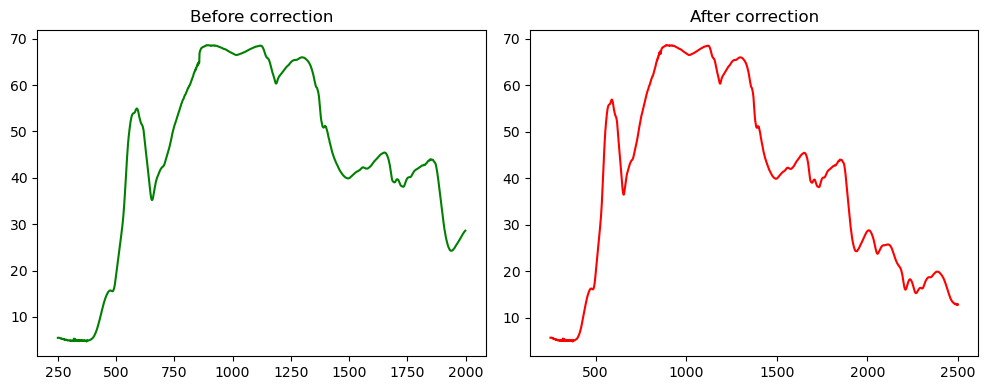

index 0 is out of bounds for axis 0 with size 0
CICIMAUCR0014-2.Sample.txt
CICIMAUCR0014-2.txt


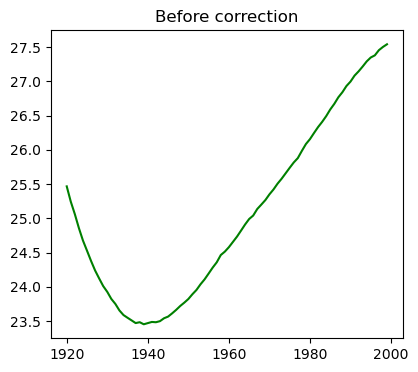

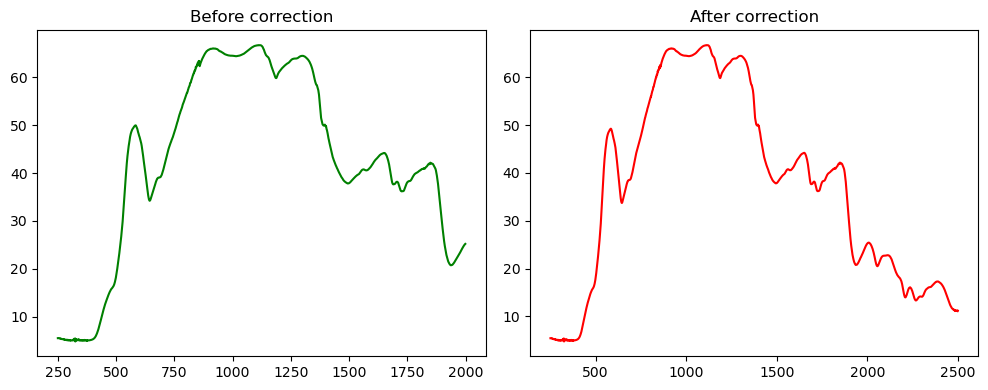

CICIMAUCR0014-3.Sample.txt
CICIMAUCR0014-3.txt


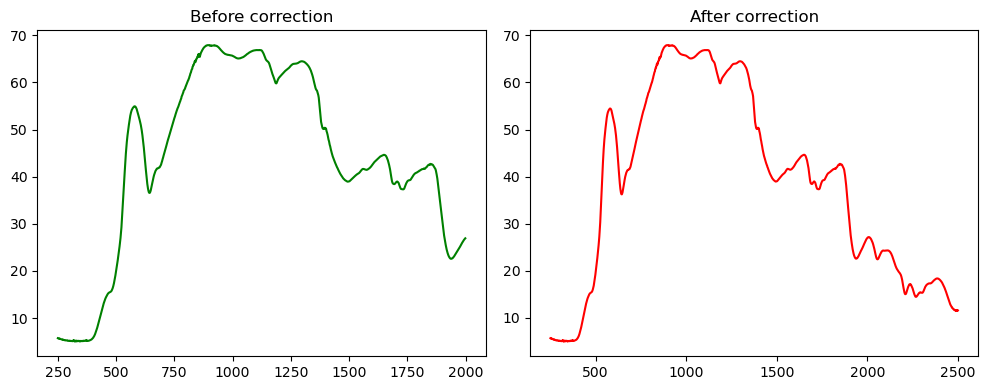

CICIMAUCR0015-1.Sample.txt
CICIMAUCR0015-1.txt


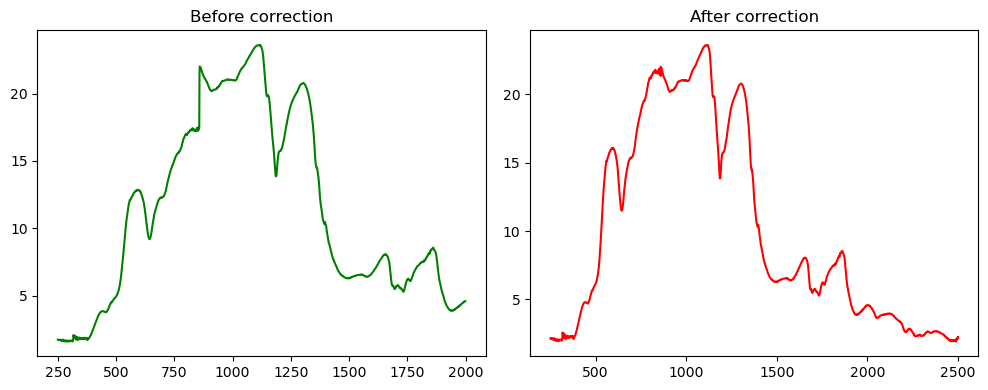

CICIMAUCR0015-2.Sample.txt
CICIMAUCR0015-2.txt


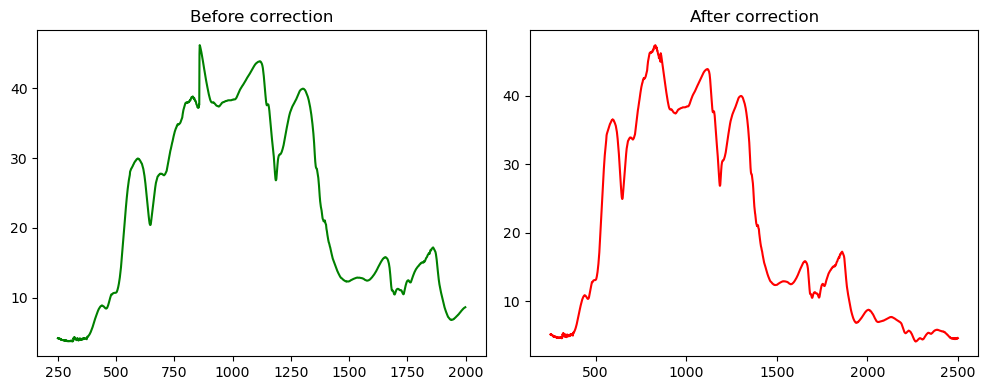

CICIMAUCR0015-3.Sample.txt
CICIMAUCR0015-3.txt


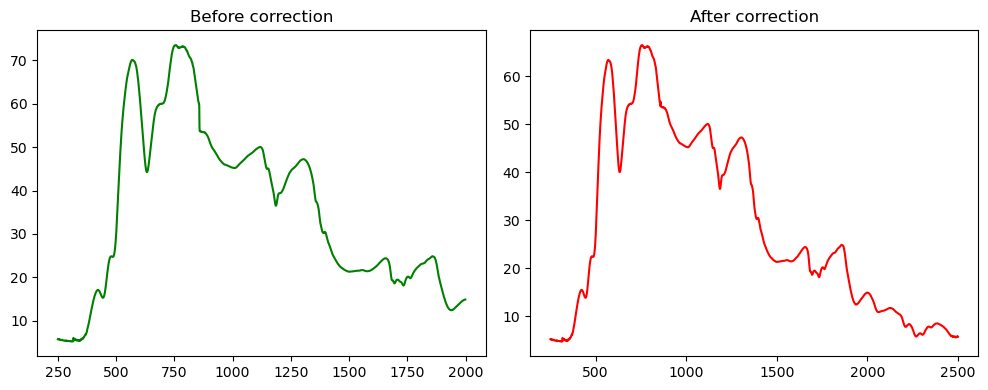

CICIMAUCR0018-1.Sample.txt
CICIMAUCR0018-1.txt


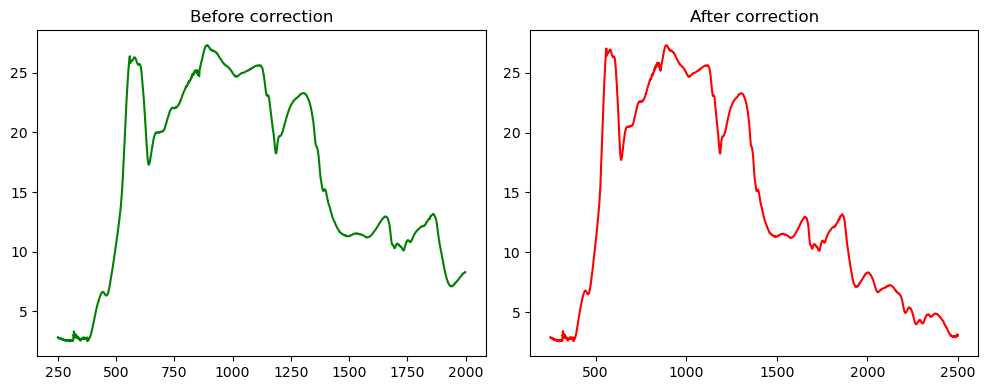

CICIMAUCR0018-2.Sample.txt
CICIMAUCR0018-2.txt


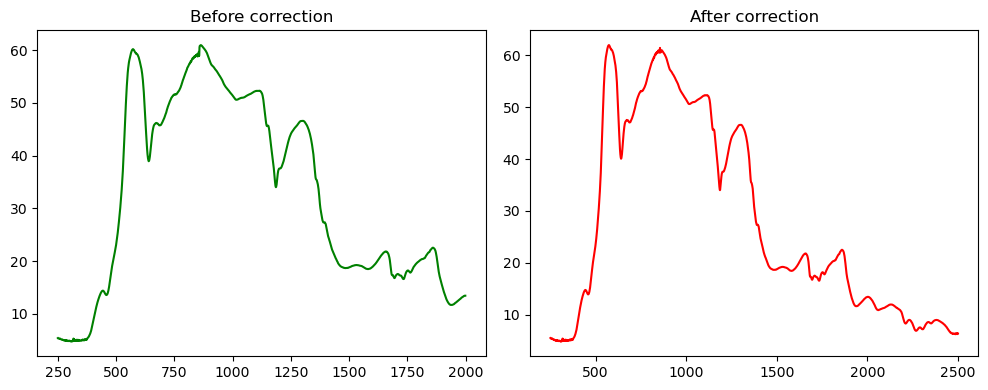

CICIMAUCR0018-3.Sample.txt
CICIMAUCR0018-3.txt


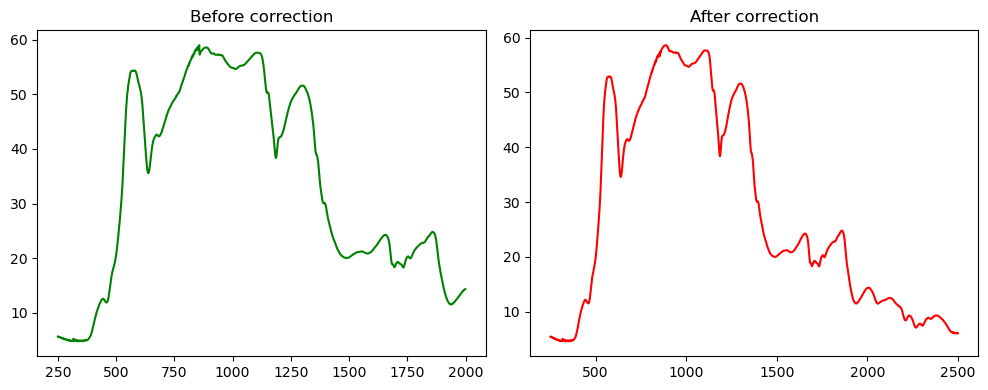

CICIMAUCR0019-1.Sample.txt
CICIMAUCR0019-1.txt


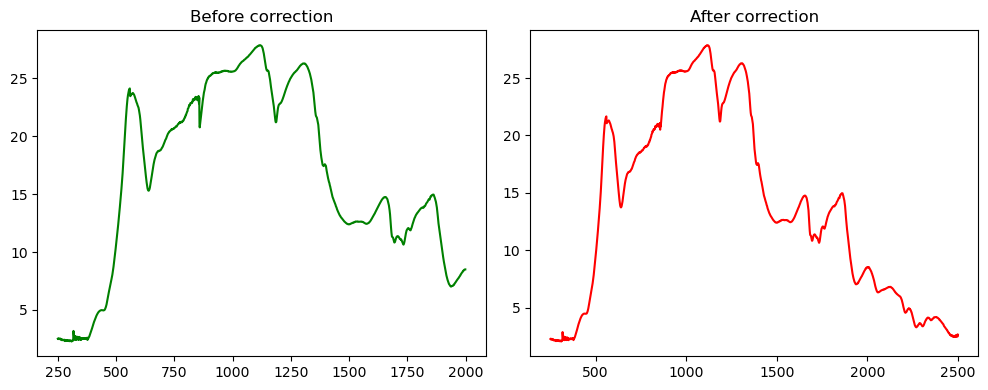

CICIMAUCR0019-2.Sample.txt
CICIMAUCR0019-2.txt


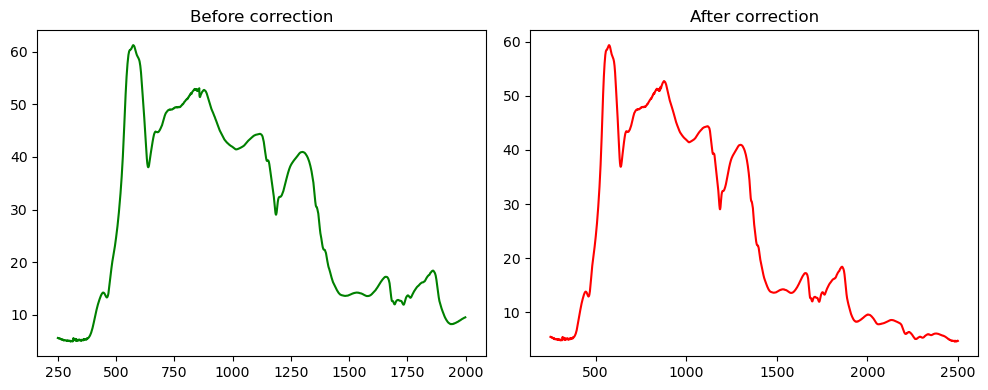

CICIMAUCR0019-3.Sample.txt
CICIMAUCR0019-3.txt


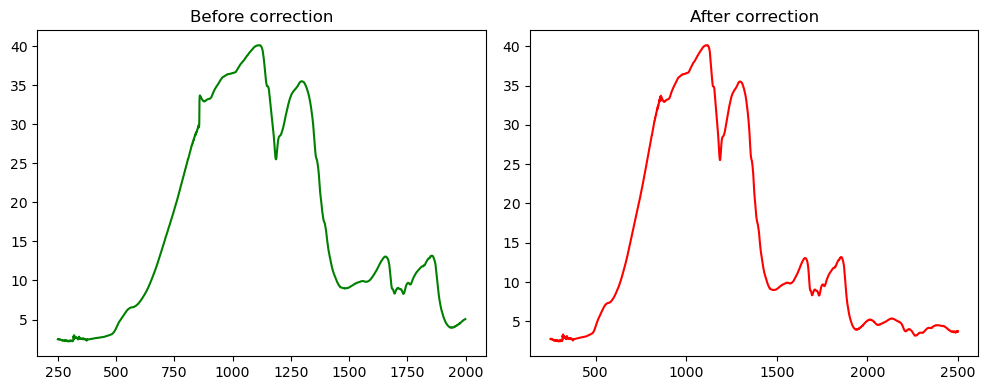

CICIMAUCR0020-1.Sample.txt
CICIMAUCR0020-1.txt


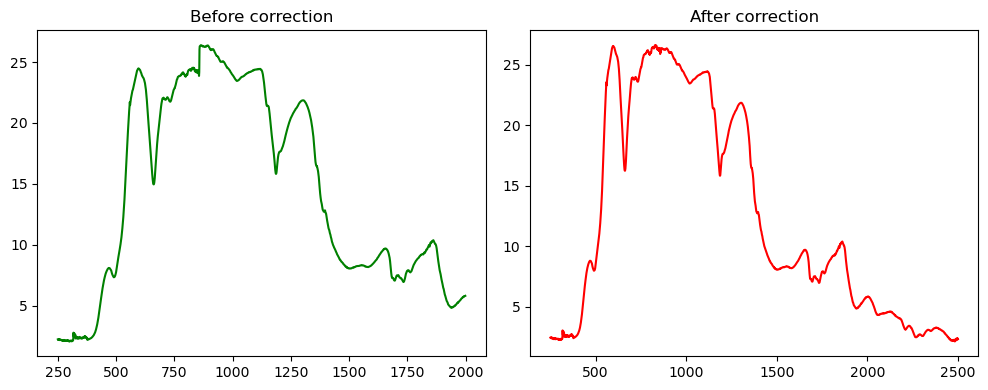

CICIMAUCR0020-2.Sample.txt
CICIMAUCR0020-2.txt


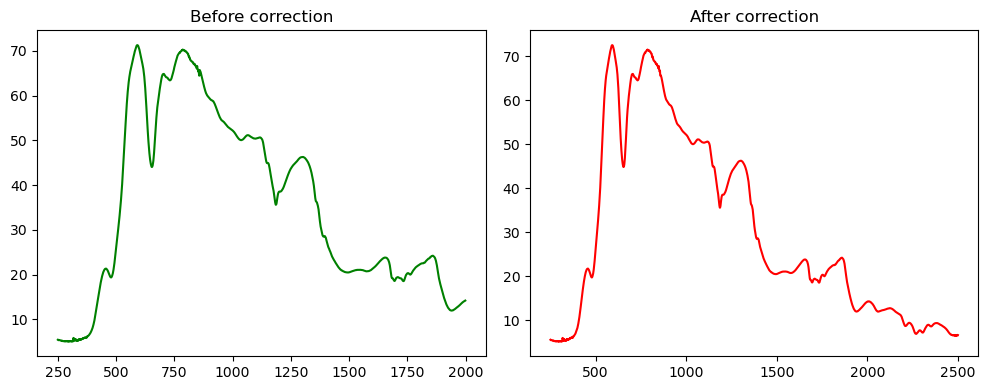

CICIMAUCR0020-3.Sample.txt
CICIMAUCR0020-3.txt


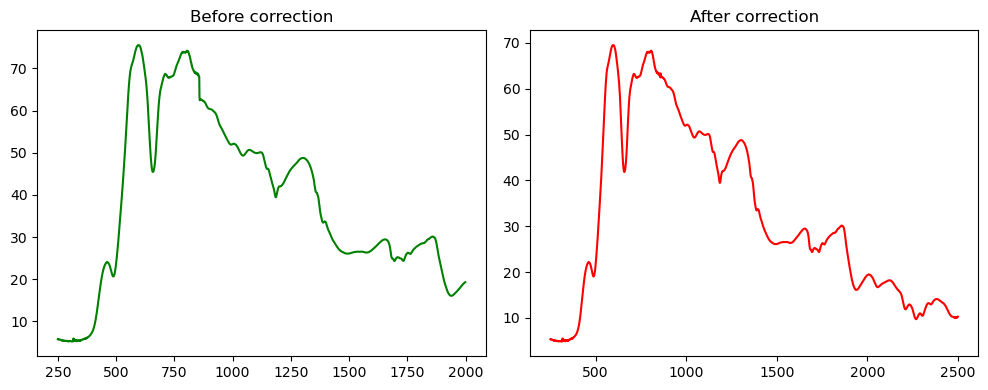

CICIMAUCR0021-1.Sample.txt
CICIMAUCR0021-1.txt


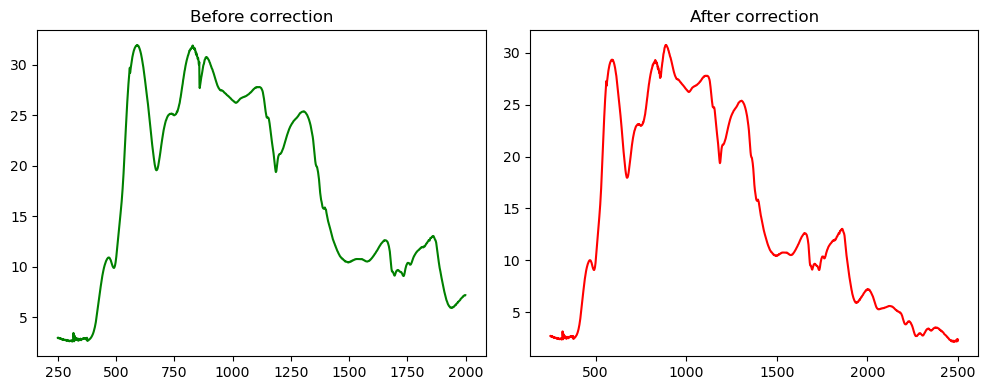

CICIMAUCR0021-2.Sample.txt
CICIMAUCR0021-2.txt


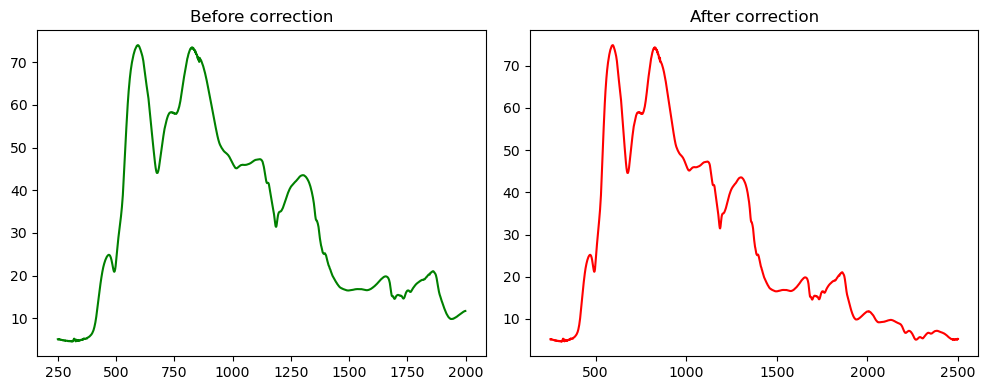

CICIMAUCR0021-3.Sample.txt
CICIMAUCR0021-3.txt


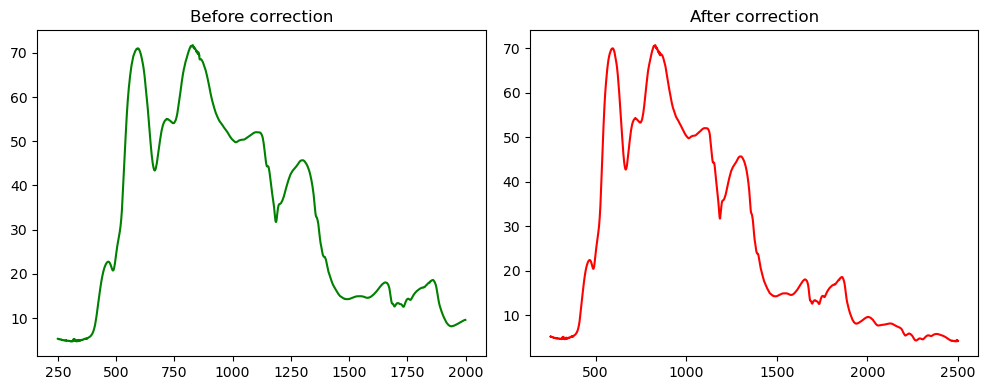

CICIMAUCR0044-1.txt
CICIMAUCR0044-1.txt


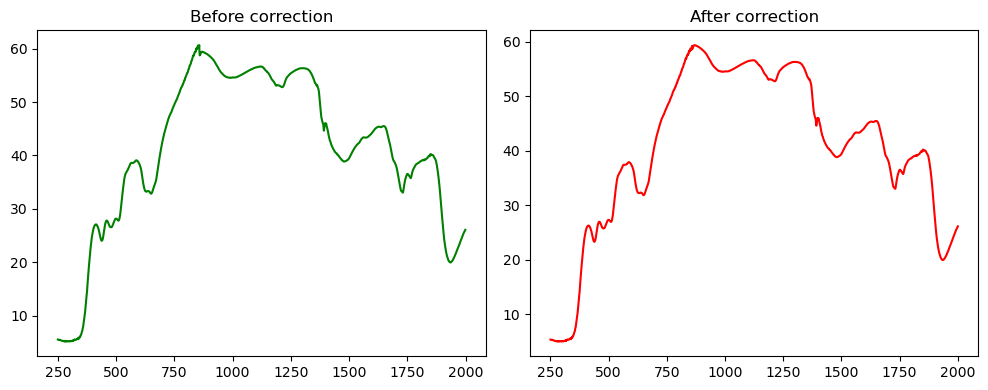

CICIMAUCR0070-1.txt
CICIMAUCR0070-1.txt


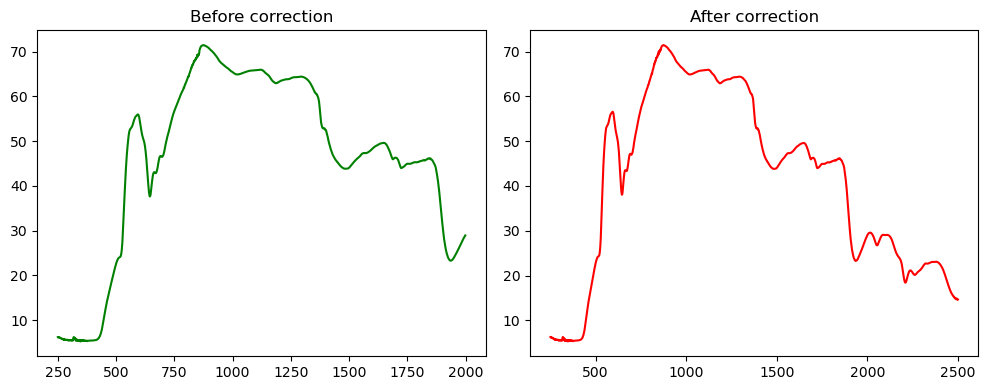

CICIMAUCR0070-2.Sample.txt
CICIMAUCR0070-2.txt


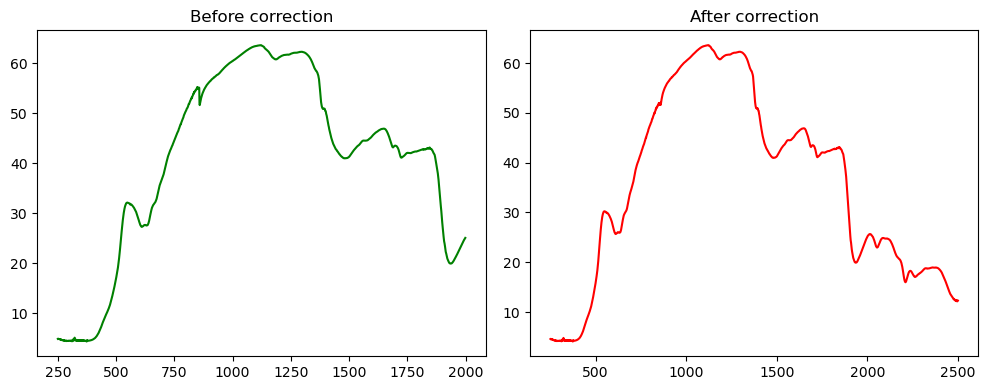

CICIMAUCR0070-3.Sample.txt
CICIMAUCR0070-3.txt


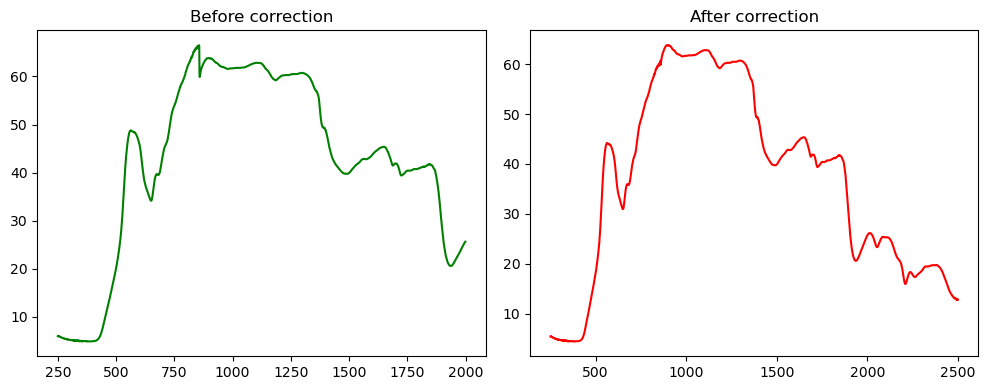

CICIMAUCR0071-1.txt
CICIMAUCR0071-1.txt


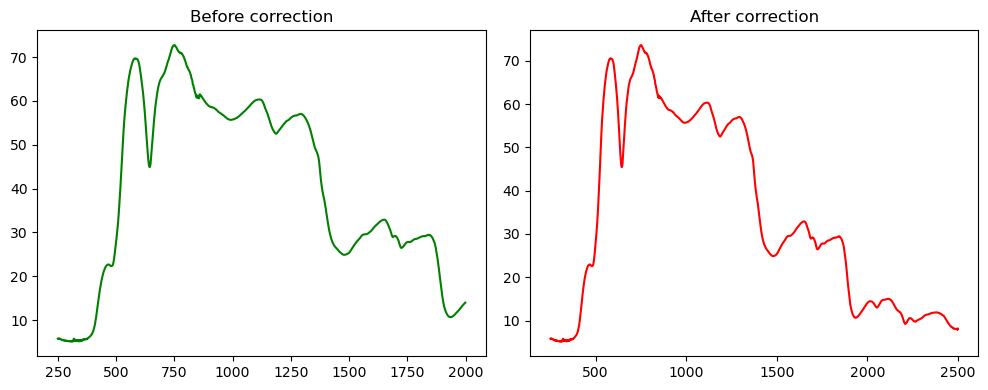

CICIMAUCR0071-2.Sample.txt
CICIMAUCR0071-2.txt


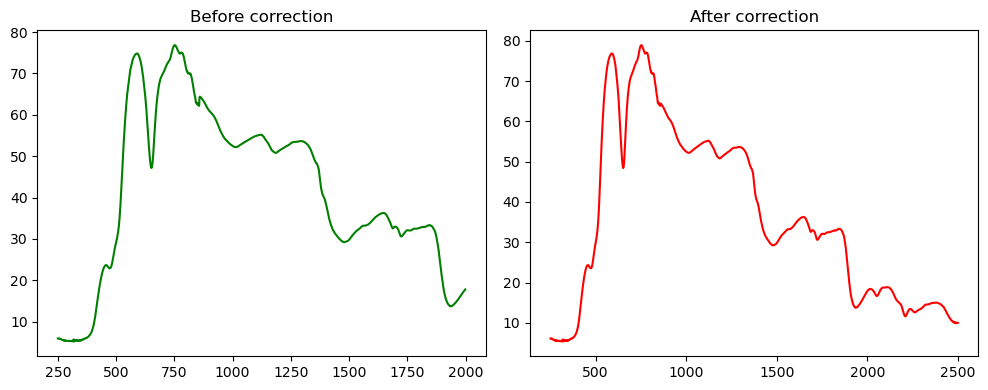

CICIMAUCR0071-3.Sample.txt
CICIMAUCR0071-3.txt


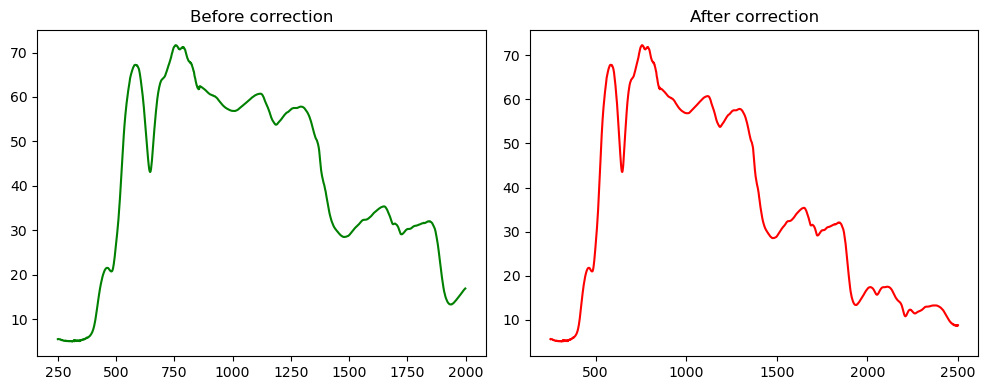

CICIMAUCR0097-1.txt
CICIMAUCR0097-1.txt


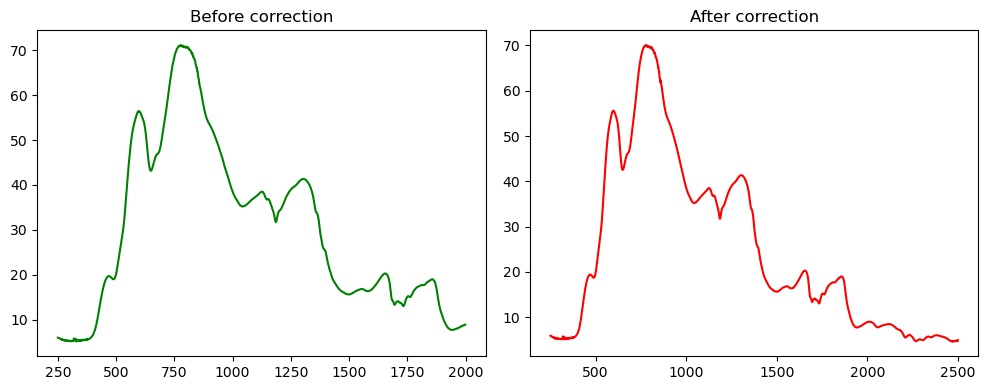

CICIMAUCR0097-2.Sample.txt
CICIMAUCR0097-2.txt


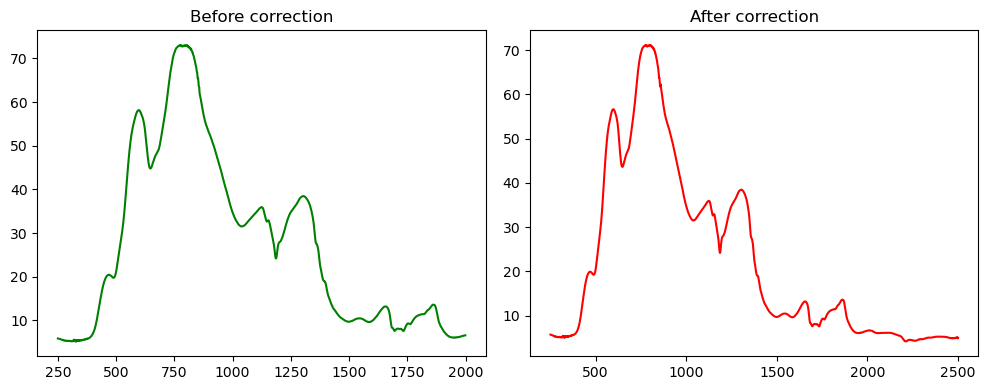

CICIMAUCR0097-3.Sample.txt
CICIMAUCR0097-3.txt


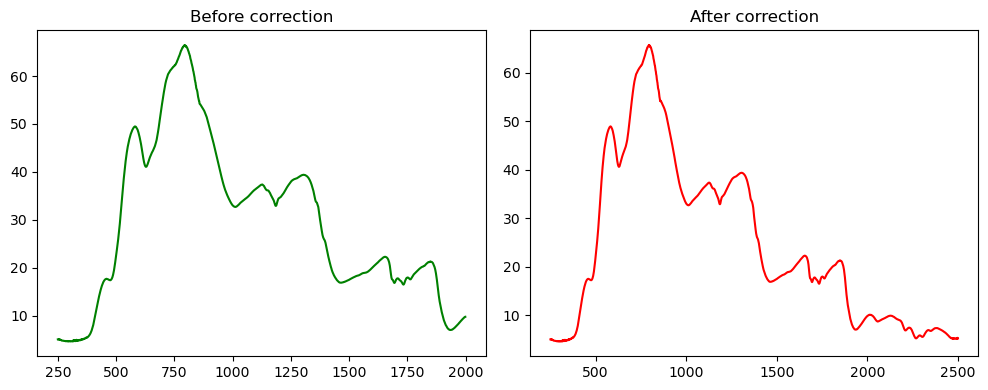

CICIMAUCR0098-1.txt
CICIMAUCR0098-1.txt


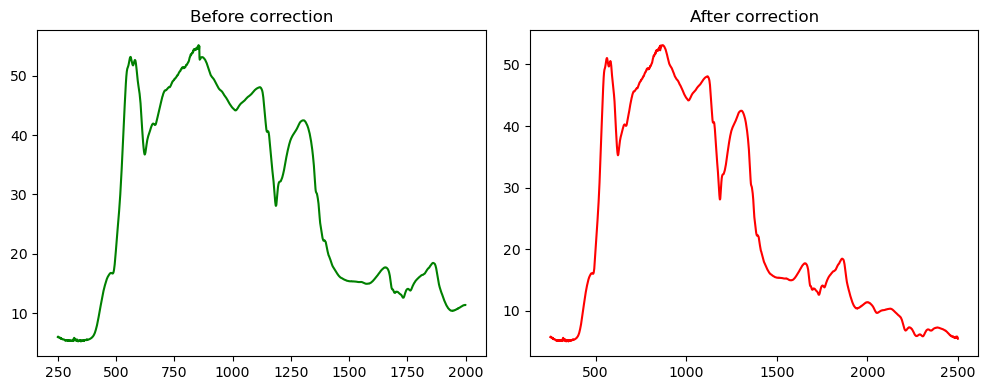

CICIMAUCR0098-2.Sample.txt
CICIMAUCR0098-2.txt


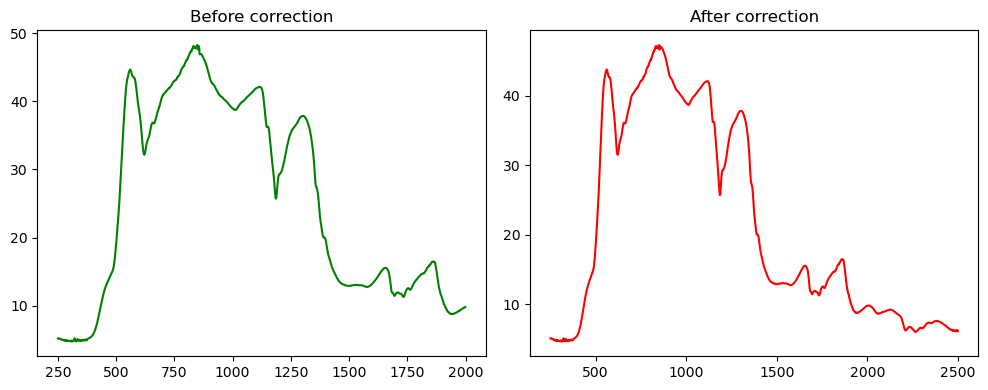

CICIMAUCR0098-3.Sample.txt
CICIMAUCR0098-3.txt


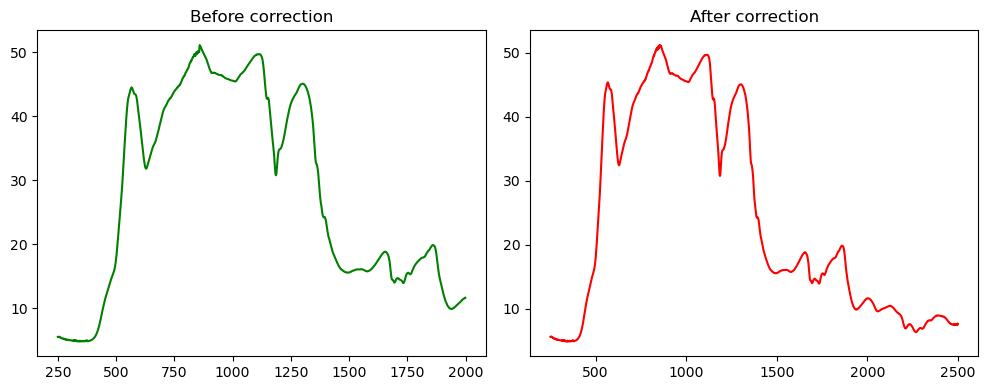

CICIMAUCR0100-1.txt
CICIMAUCR0100-1.txt


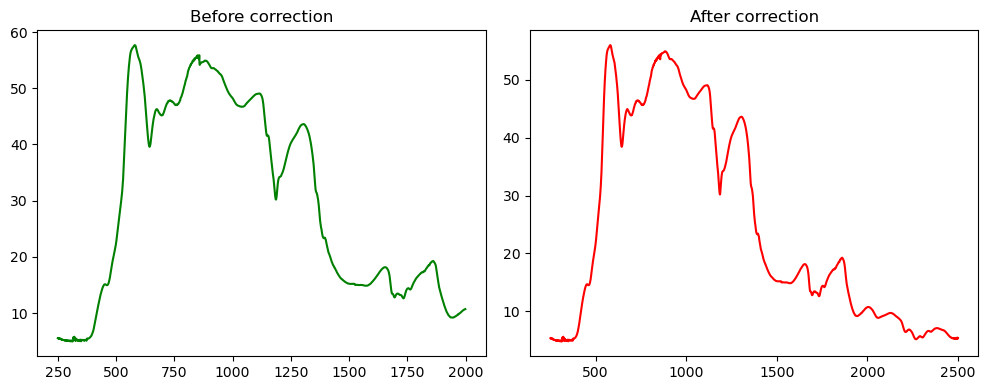

CICIMAUCR0100-2.Sample.txt
CICIMAUCR0100-2.txt


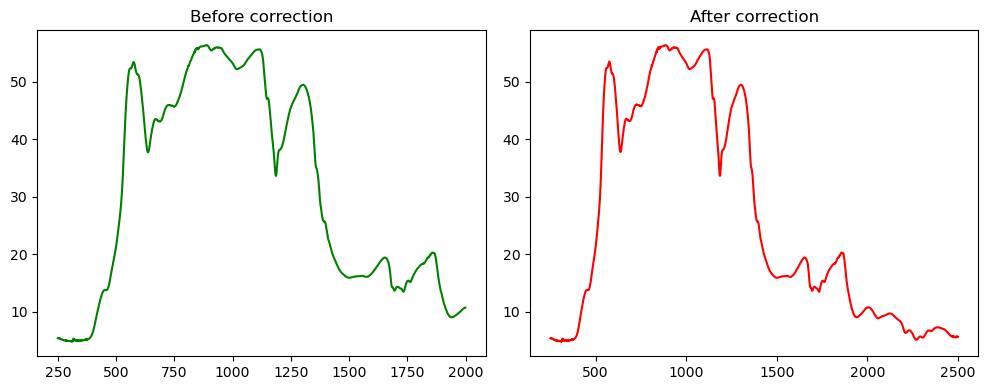

CICIMAUCR0100-3.Sample.txt
CICIMAUCR0100-3.txt


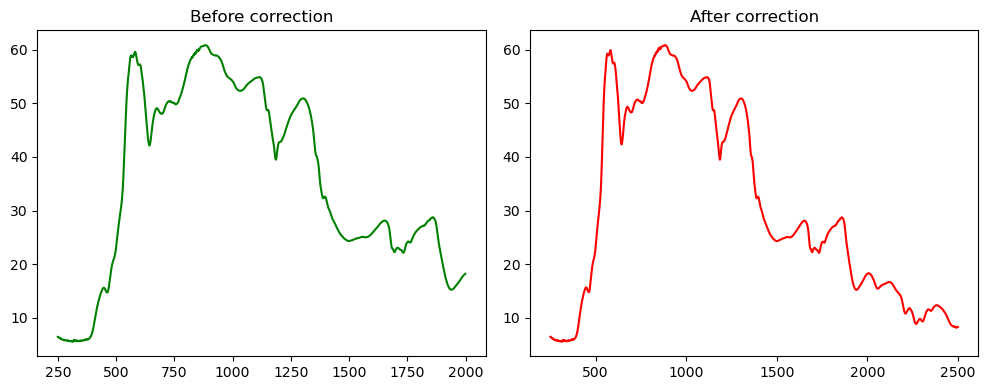

CICIMAUCR0101-1.txt
CICIMAUCR0101-1.txt


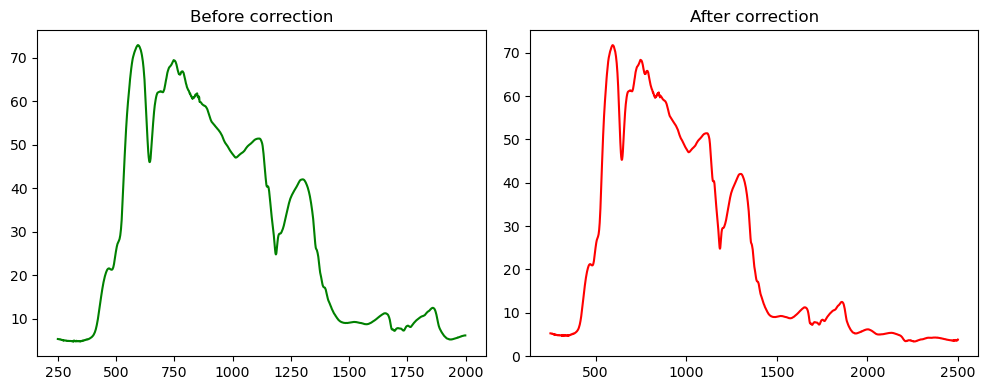

CICIMAUCR0104-1.txt
CICIMAUCR0104-1.txt


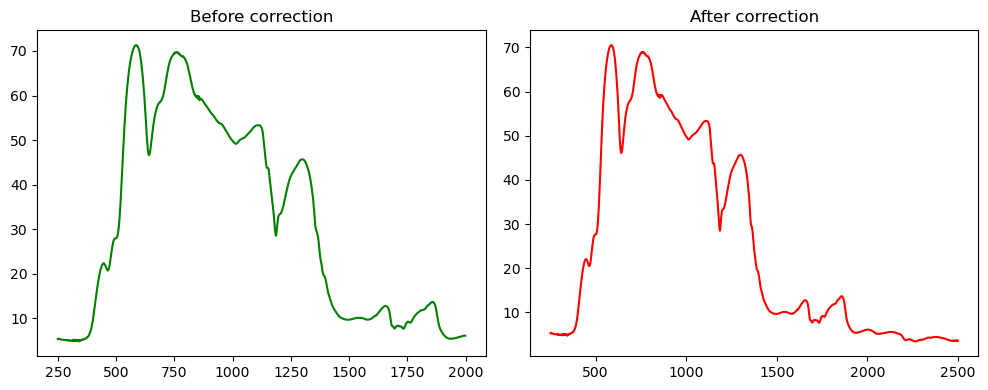

CICIMAUCR0104-1.Sample.txt
CICIMAUCR0104-1.txt


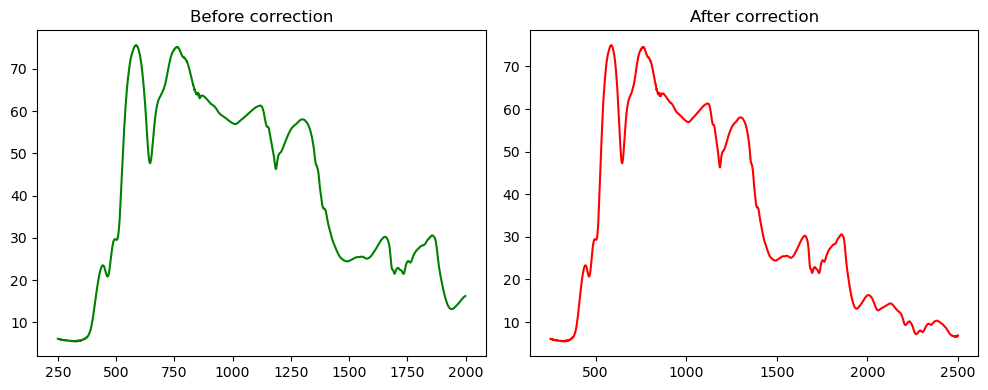

CICIMAUCR0104-2.Sample.txt
CICIMAUCR0104-2.txt


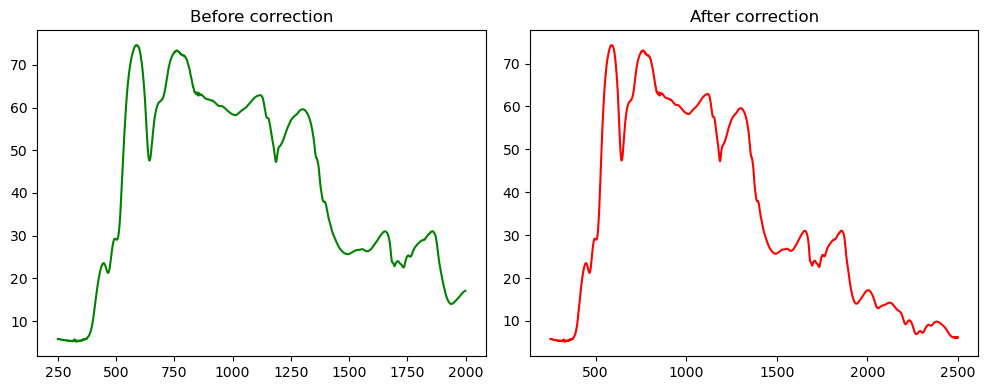

CICIMAUCR0104-3.Sample.txt
CICIMAUCR0104-3.txt


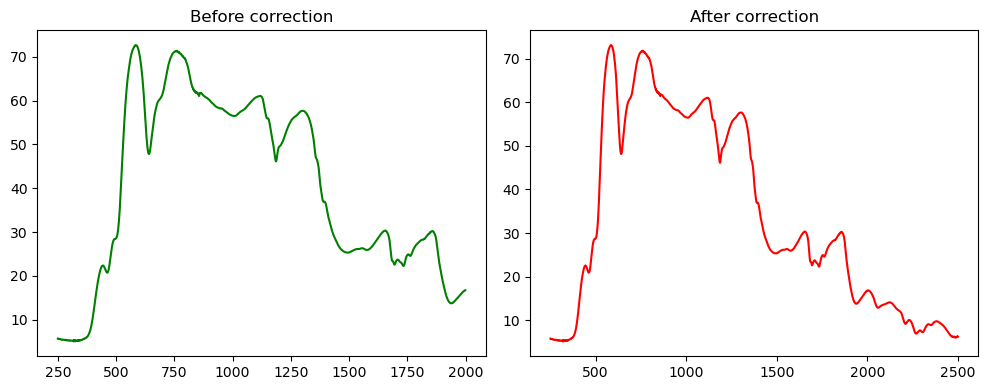

CICIMAUCR0108-1.Sample.txt
CICIMAUCR0108-1.txt


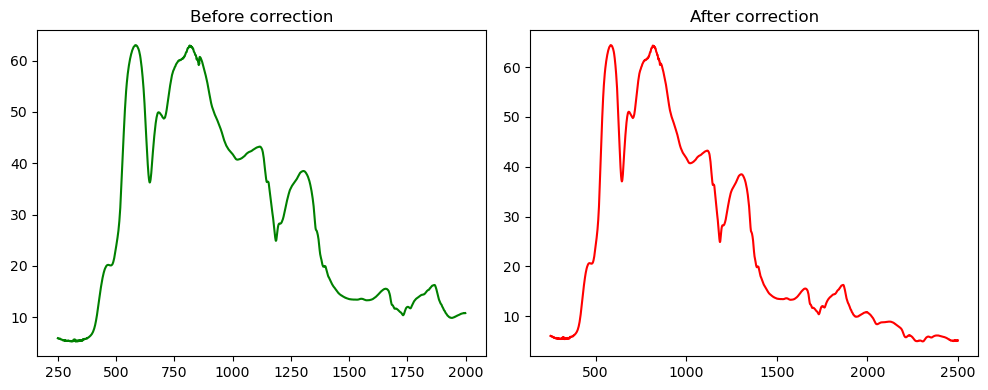

CICIMAUCR0108-2.Sample.txt
CICIMAUCR0108-2.txt


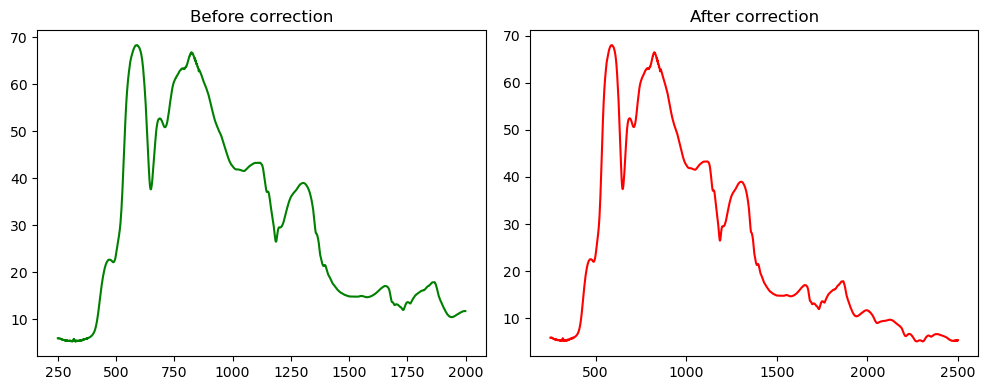

CICIMAUCR0108-3.Sample.txt
CICIMAUCR0108-3.txt


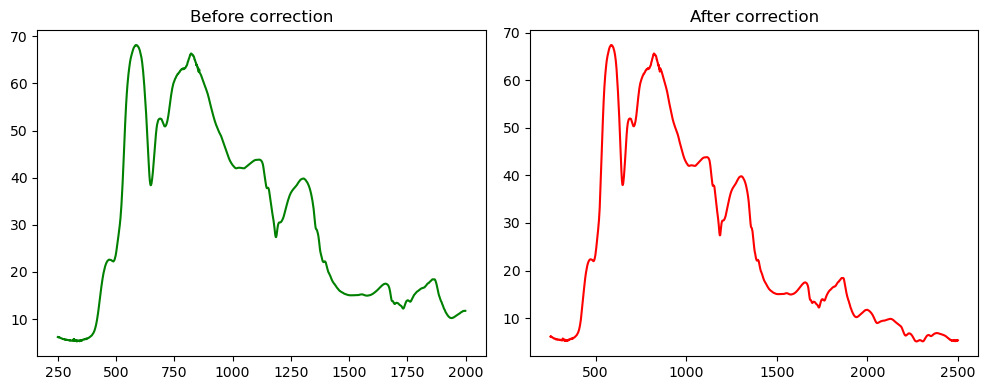

CICIMAUCR0112-1.Sample.txt
CICIMAUCR0112-1.txt


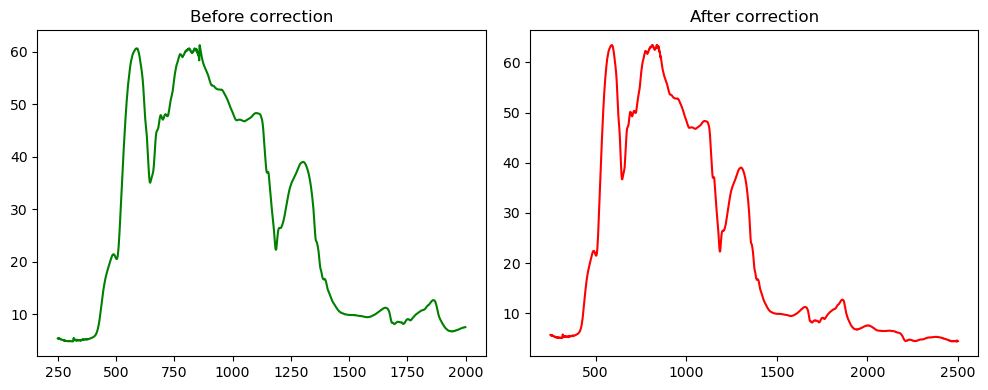

CICIMAUCR0112-2.Sample.txt
CICIMAUCR0112-2.txt


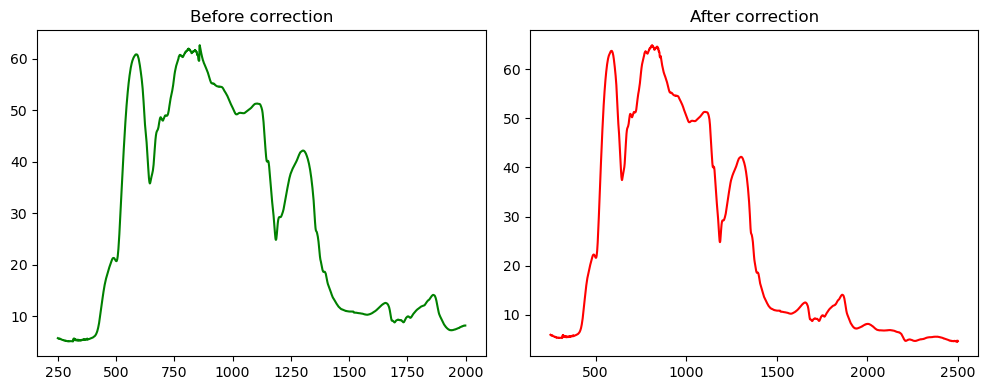

CICIMAUCR0113-1.txt
CICIMAUCR0113-1.txt


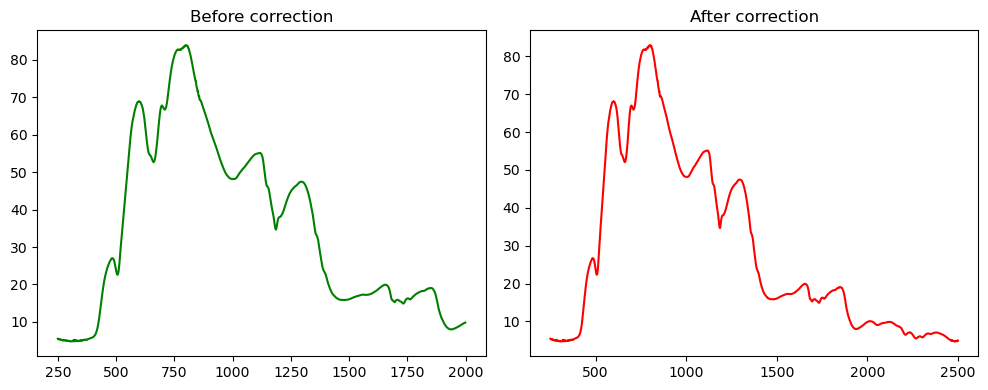

CICIMAUCR0113-2.Sample.txt
CICIMAUCR0113-2.txt


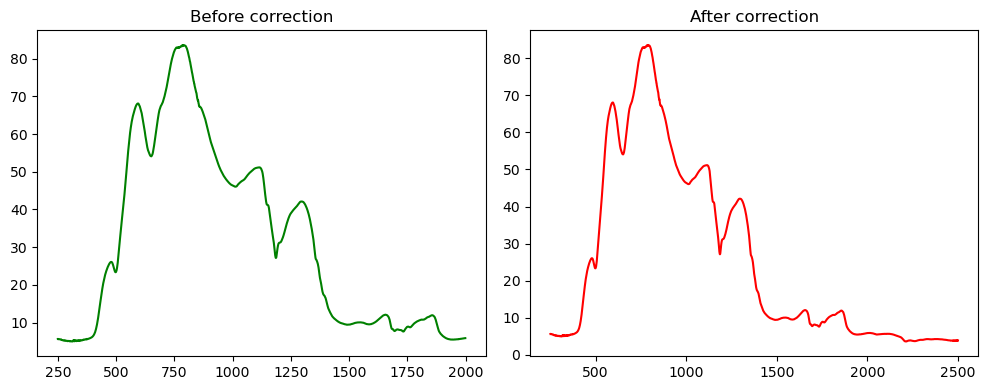

CICIMAUCR0113-3.Sample.txt
CICIMAUCR0113-3.txt


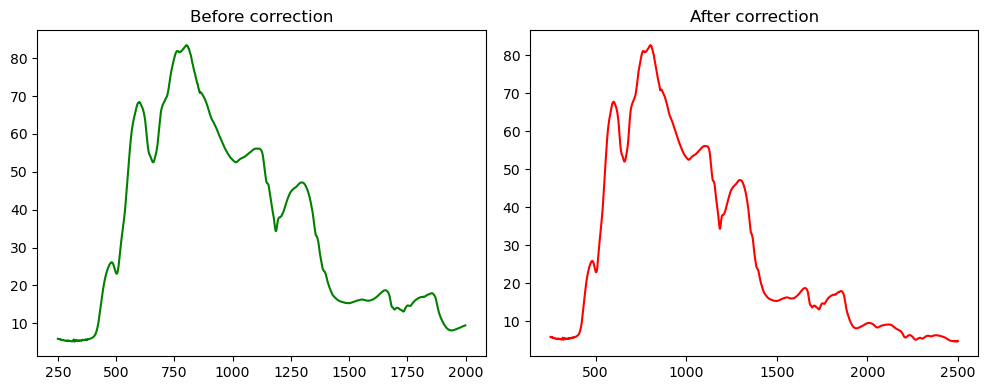

CICIMAUCR0116-1.txt
CICIMAUCR0116-1.txt


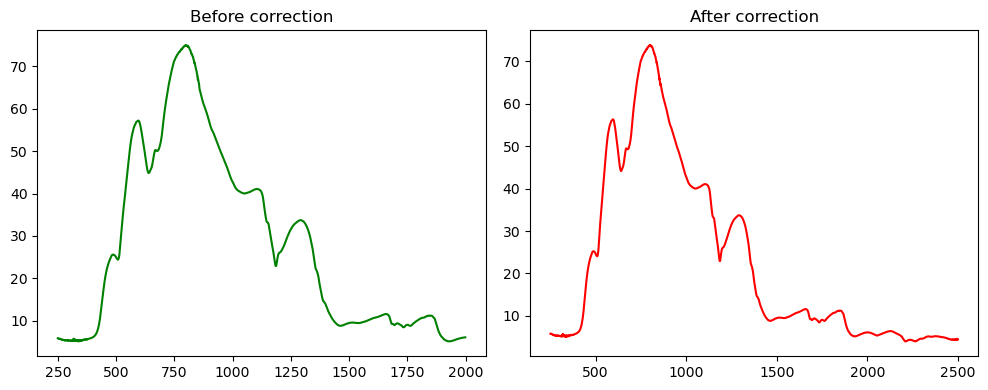

CICIMAUCR0141-1.txt
CICIMAUCR0141-1.txt


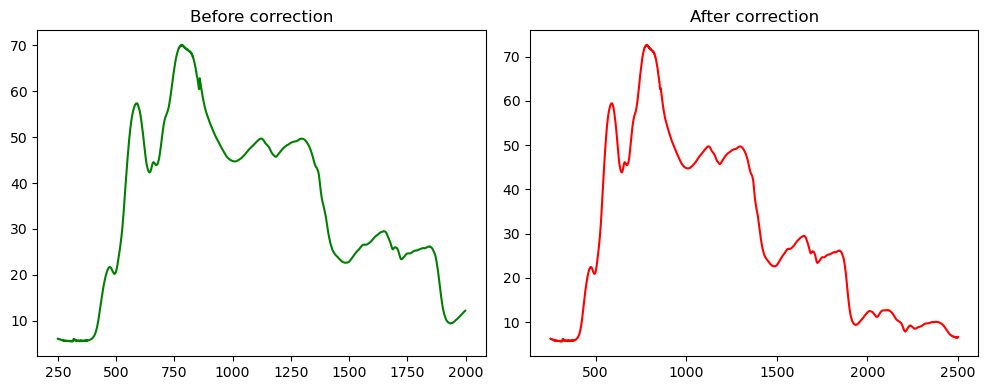

CICIMAUCR0141-1.Sample.txt
CICIMAUCR0141-1.txt


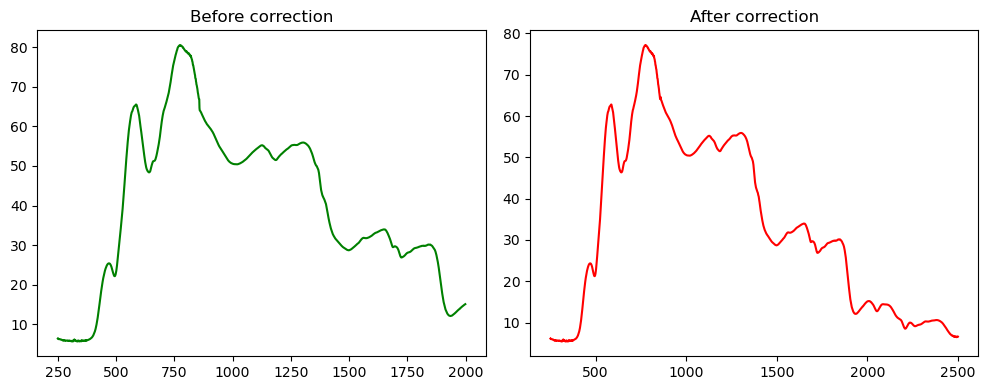

CICIMAUCR0141-2.Sample.txt
CICIMAUCR0141-2.txt


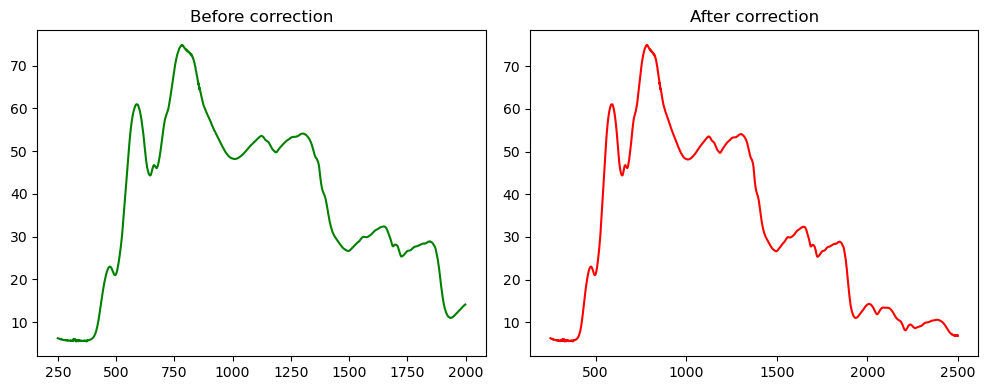

CICIMAUCR0141-3.Sample.txt
CICIMAUCR0141-3.txt


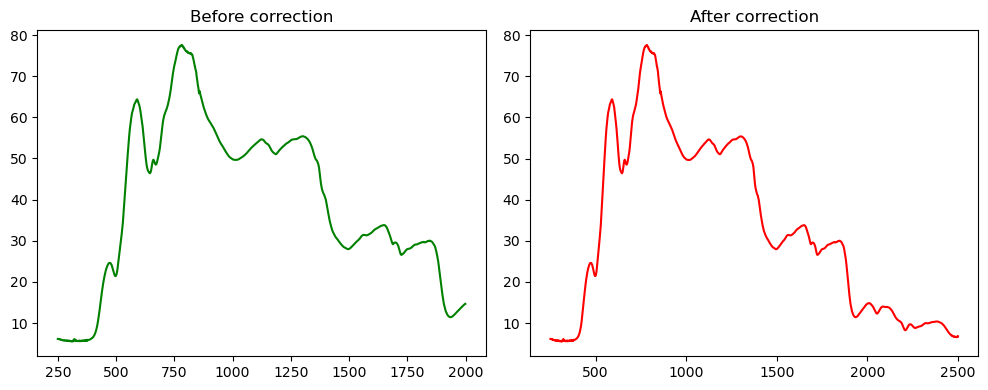

CICIMAUCR0158-1.txt
CICIMAUCR0158-1.txt


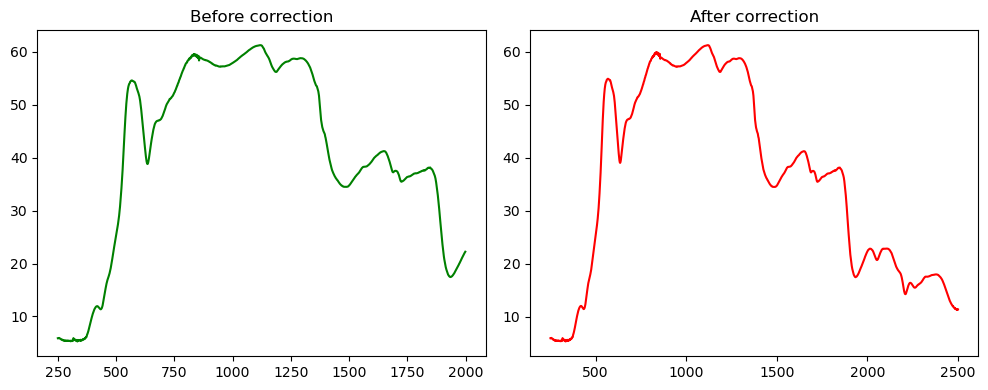

In [14]:
for file in filtered_list:

    #obtain metadata
    metadata, df = get_metadata_and_dataframe(file_folder_data_path + "//"+file)
    
    #create figure
    plt.figure(figsize=(10, 4))
    #plots before changes
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
    plt.plot(df["wavelength"], df[metadata["measuring_mode"]], color = "g")
    plt.title('Before correction')
    
    #Fix jump correction
    df_corrected = jump_correction(file_folder_data_path, file, metadata)
    
    #plots changes
    if not df_corrected.empty:
        plt.subplot(1, 2, 2)
        plt.plot(df_corrected["wavelength"], df_corrected[metadata["measuring_mode"]], color = "r")
        
        plt.title('After correction')
        
        #Show comparison
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()